In [178]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [179]:
df = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [180]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [181]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [182]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [183]:
df['area code'] = df['area code'].astype('object')


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [185]:
target = 'churn'
cat_cols = df.select_dtypes(include='object').columns.drop(target, errors='ignore')
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [186]:
df.groupby('churn')[num_cols].mean().T


churn,False,True
account length,100.793684,102.664596
number vmail messages,8.604561,5.115942
total day minutes,175.175754,206.914079
total day calls,100.283158,101.335404
total day charge,29.780421,35.175921
total eve minutes,199.043298,212.410145
total eve calls,100.038596,100.561077
total eve charge,16.918909,18.054969
total night minutes,200.133193,205.231677
total night calls,100.058246,100.399586


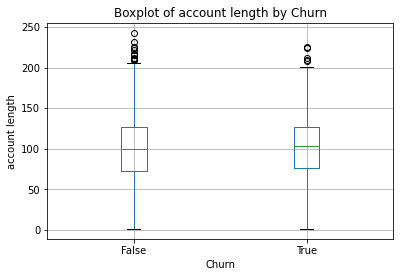

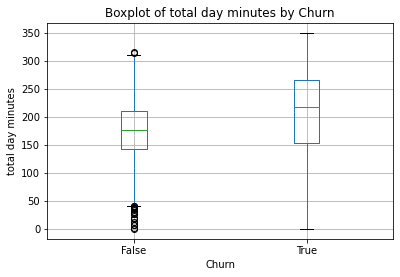

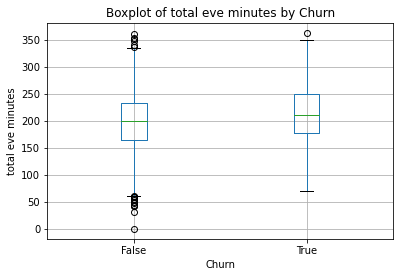

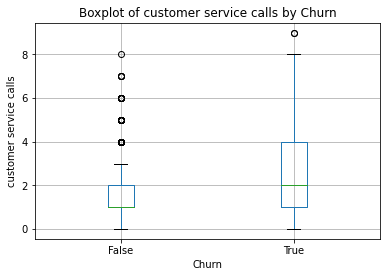

In [187]:
important_nums = [
    'account length',
    'total day minutes',
    'total eve minutes',
    'customer service calls'
]

for col in important_nums:
    df.boxplot(column=col, by='churn', figsize=(6,4))
    plt.title(f'Boxplot of {col} by Churn')
    plt.suptitle('')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()


In [188]:
for col in cat_cols:
    print(df.groupby(col)['churn'].mean())
    print('-' * 40)


state
AK    0.057692
AL    0.100000
AR    0.200000
AZ    0.062500
CA    0.264706
CO    0.136364
CT    0.162162
DC    0.092593
DE    0.147541
FL    0.126984
GA    0.148148
HI    0.056604
IA    0.068182
ID    0.123288
IL    0.086207
IN    0.126761
KS    0.185714
KY    0.135593
LA    0.078431
MA    0.169231
MD    0.242857
ME    0.209677
MI    0.219178
MN    0.178571
MO    0.111111
MS    0.215385
MT    0.205882
NC    0.161765
ND    0.096774
NE    0.081967
NH    0.160714
NJ    0.264706
NM    0.096774
NV    0.212121
NY    0.180723
OH    0.128205
OK    0.147541
OR    0.141026
PA    0.177778
RI    0.092308
SC    0.233333
SD    0.133333
TN    0.094340
TX    0.250000
UT    0.138889
VA    0.064935
VT    0.109589
WA    0.212121
WI    0.089744
WV    0.094340
WY    0.116883
Name: churn, dtype: float64
----------------------------------------
area code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64
----------------------------------------
phone number
327-1058    False
32

In [189]:
X = df.drop(columns=['churn', 'phone number'])
y = df['churn'].astype(int)

In [190]:
binary_cols = ['international plan', 'voice mail plan']
multi_cols = ['state', 'area code']

In [191]:
binary_cols, multi_cols

(['international plan', 'voice mail plan'], ['state', 'area code'])

In [192]:
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])



In [193]:
ohe = OneHotEncoder(sparse= False, drop='first')
multi_encoded = ohe.fit_transform(X[multi_cols])

multi_col_names = ohe.get_feature_names(multi_cols)
multi_encoded_df = pd.DataFrame(multi_encoded, columns=multi_col_names, index=X.index)
multi_encoded_df



,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3331,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


                       account length  international plan  voice mail plan  \
account length               1.000000            0.024735         0.002918   
international plan           0.024735            1.000000         0.006006   
voice mail plan              0.002918            0.006006         1.000000   
number vmail messages       -0.004628            0.008745         0.956927   
total day minutes            0.006216            0.049396        -0.001684   
...                               ...                 ...              ...   
state_WV                    -0.025631           -0.018913        -0.001233   
state_WY                     0.018058            0.017134        -0.014735   
area code_415                0.000102           -0.021066         0.017682   
area code_510               -0.011931            0.048109        -0.002112   
churn                        0.016541            0.259852        -0.102148   

                       number vmail messages  total day minutes

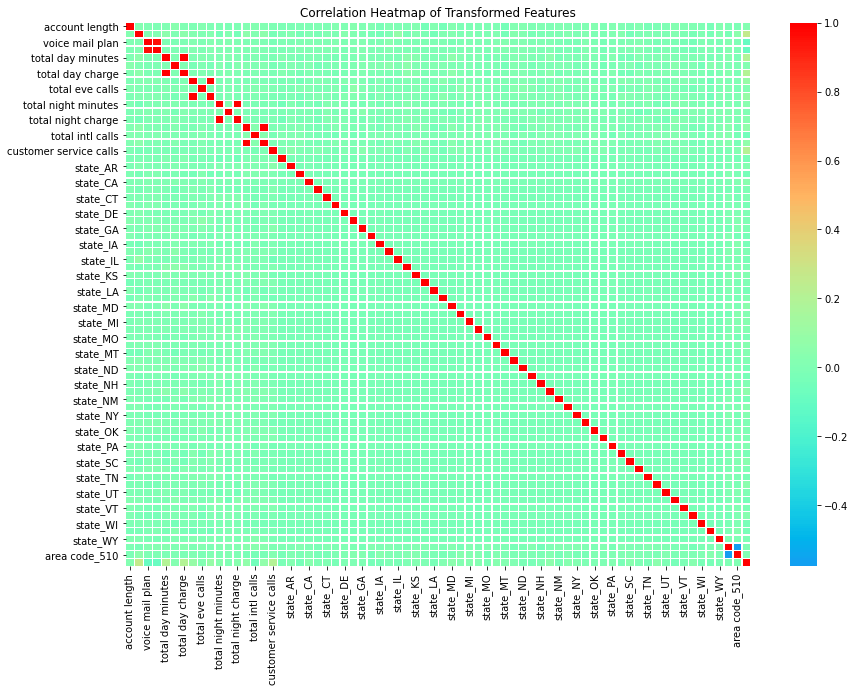

In [ ]:
df_final = pd.concat([X.drop(columns=multi_cols), multi_encoded_df, y], axis=1)
corr_df = df_final.drop(columns=['phone number'], errors='ignore')
corr = corr_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    cmap='rainbow',
    center=0,
    linewidths=0.3
)

plt.title('Correlation Heatmap of Transformed Features')
plt.show()


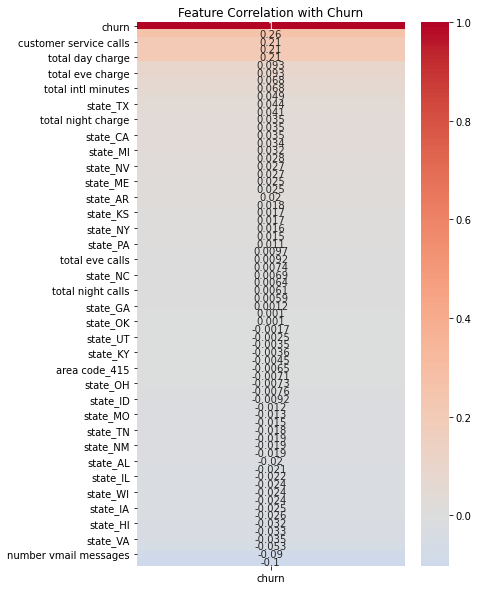

In [200]:
churn_corr = corr[['churn']].sort_values(by='churn', ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(
    churn_corr,
    annot=True,
    cmap='coolwarm',
    center=0
)

plt.title('Feature Correlation with Churn')
plt.show()


In [ ]:
X = X.drop(columns= multi_cols)
X = pd.concat([X, multi_encoded_df], axis= 1)

In [ ]:
X

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int32  
 2   voice mail plan         3333 non-null   int32  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.747
Confusion Matrix:
 [[646 209]
 [ 44 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       855
           1       0.33      0.70      0.44       145

    accuracy                           0.75      1000
   macro avg       0.63      0.73      0.64      1000
weighted avg       0.85      0.75      0.78      1000

